## Get Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

## Checkout Data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#Rename train as df so we dont get confused with train_test_split later on
df_prep = train

In [9]:
#describe the data
df_prep.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [10]:
# check for null values
df_prep.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Feature Engineering

In [5]:
#Convert timestamp from object into datetime64
df_prep['datetime'] = pd.to_datetime(df_prep['datetime'])

In [6]:
#Create Hour, Month and Day of Week columns

df_prep['Hour'] = df_prep['datetime'].apply(lambda time: time.hour)
df_prep['Month'] = df_prep['datetime'].apply(lambda time: time.month)
df_prep['Day_of_Week'] = df_prep['datetime'].apply(lambda time: time.dayofweek)
df_prep['Year'] = df_prep['datetime'].apply(lambda time: time.year)

In [7]:
df_prep.set_index('datetime',inplace=True)

In [16]:
df_prep.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,Day_of_Week,Year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5,2011


In [8]:
#Convert Season into Categorical data
df_prep['season'] = df_prep['season'].map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

In [9]:
#Convert Weather into Categorical data 
df_prep['weather'] = df_prep['weather'].map({1: "Clear", 2 : " Cloudy ", 3 : " Light Rain", 4 :" Heavy Rain" })

In [19]:
df_prep.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,Day_of_Week,Year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,0,1,5,2011
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,1,1,5,2011
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2,1,5,2011
2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,3,1,5,2011
2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,4,1,5,2011


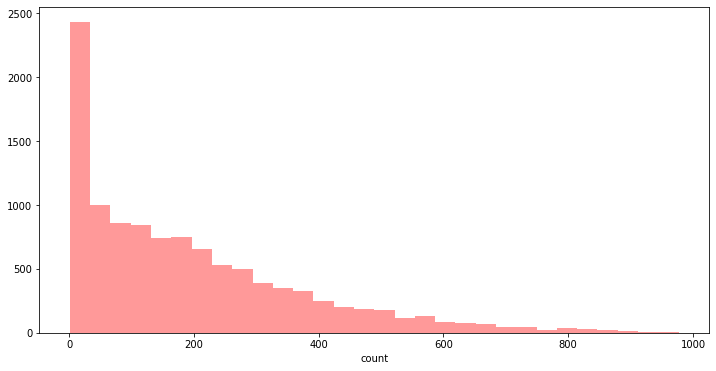

In [20]:
#Plot histogram of count column to get an idea of the distribution of count values
plt.figure(figsize=(12,6))
sns.distplot(df_prep['count'],kde=False,color='r',bins=30)

Not normally distributed. We will deal with this later, but for now leave count as it is so that figures are more meanigful for EDA.

In [10]:
df_prep['Day_of_Week'] = df_prep['Day_of_Week'].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

In [22]:
df_prep['Day_of_Week'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

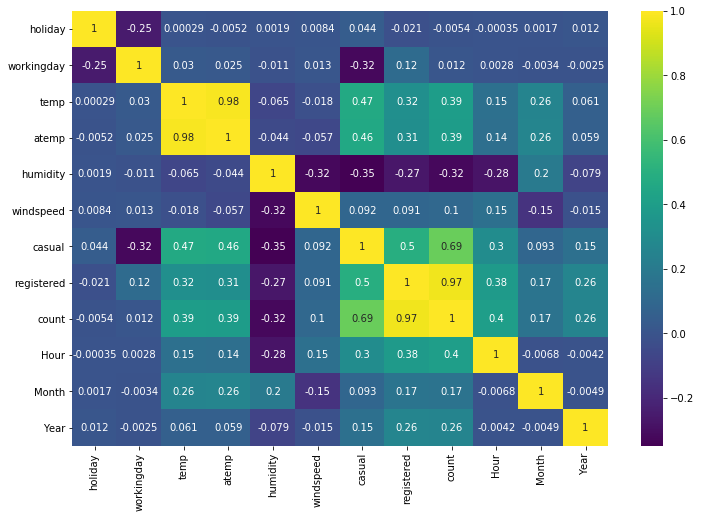

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df_prep.corr(),annot=True,cmap='viridis')

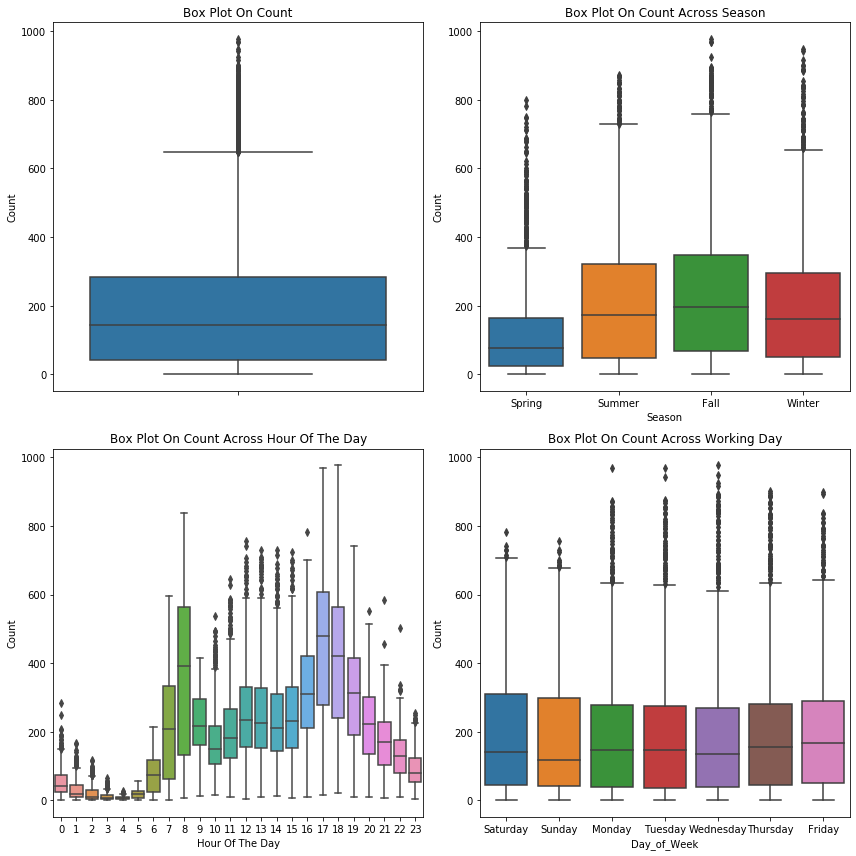

In [24]:
#Explore the categorical variables with Boxplots
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

sns.boxplot(data=df_prep,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df_prep,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df_prep,y="count",x="Hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df_prep,y="count",x="Day_of_Week",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Day_of_Week', ylabel='Count',title="Box Plot On Count Across Working Day")

fig    
plt.tight_layout()


In [11]:
#From the heatmap we can see that workingday and Day_of_Week show very high correlation. 
#They are different ways to describe the same variable.
#Remove one of these variables to avoid colinearity
# Day_of_Week shows more information than workingday
#Remove workingday
df_prep = df_prep.drop('workingday',axis=1)

In [26]:
#Looking at the season boxplot we get some unexpected behaviour with the peak season being Autumn.
# Lets check which Months are in each Season
df_prep.groupby('season')['Month'].unique()

season
Fall         [7, 8, 9]
Spring       [1, 2, 3]
Summer       [4, 5, 6]
Winter    [10, 11, 12]
Name: Month, dtype: object

In [12]:
#Create Function that creates Seasons with correct Months
def season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Autumn"


In [13]:
#Apply Season function and update season column
df_prep['season'] = df_prep['Month'].apply(lambda month: season(month))

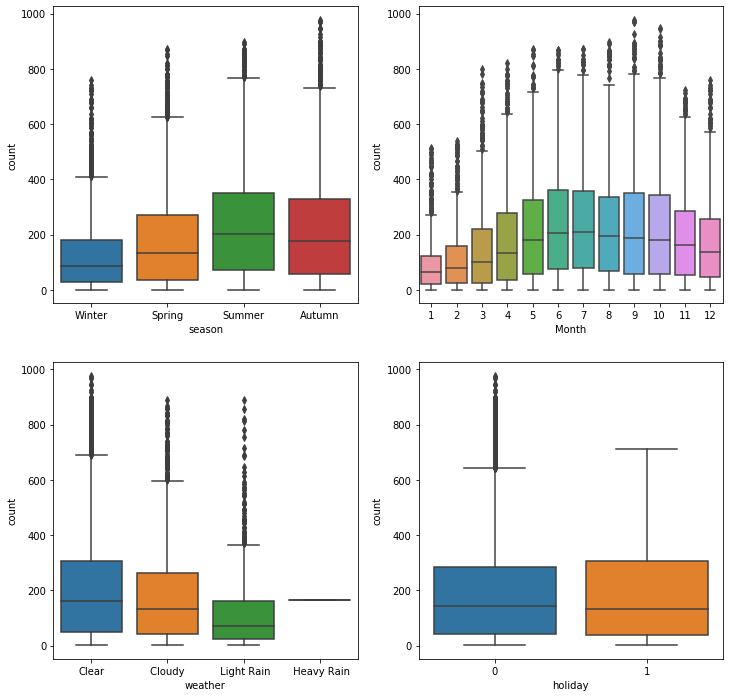

In [29]:
#Check boxplot for season
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
sns.boxplot(x='season',y='count',data=df_prep,ax=axes[0][0])
sns.boxplot(x='Month',y='count',data=df_prep,ax=axes[0][1])
sns.boxplot(x='weather',y='count',data=df_prep,ax=axes[1][0])
sns.boxplot(x='holiday',y='count',data=df_prep,ax=axes[1][1])

In [30]:
#Note there is only one instance of Heavy Rain over the 2 year period
df_prep['weather'].value_counts()

Clear          7192
 Cloudy        2834
 Light Rain     859
 Heavy Rain       1
Name: weather, dtype: int64

In [14]:
weekday =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

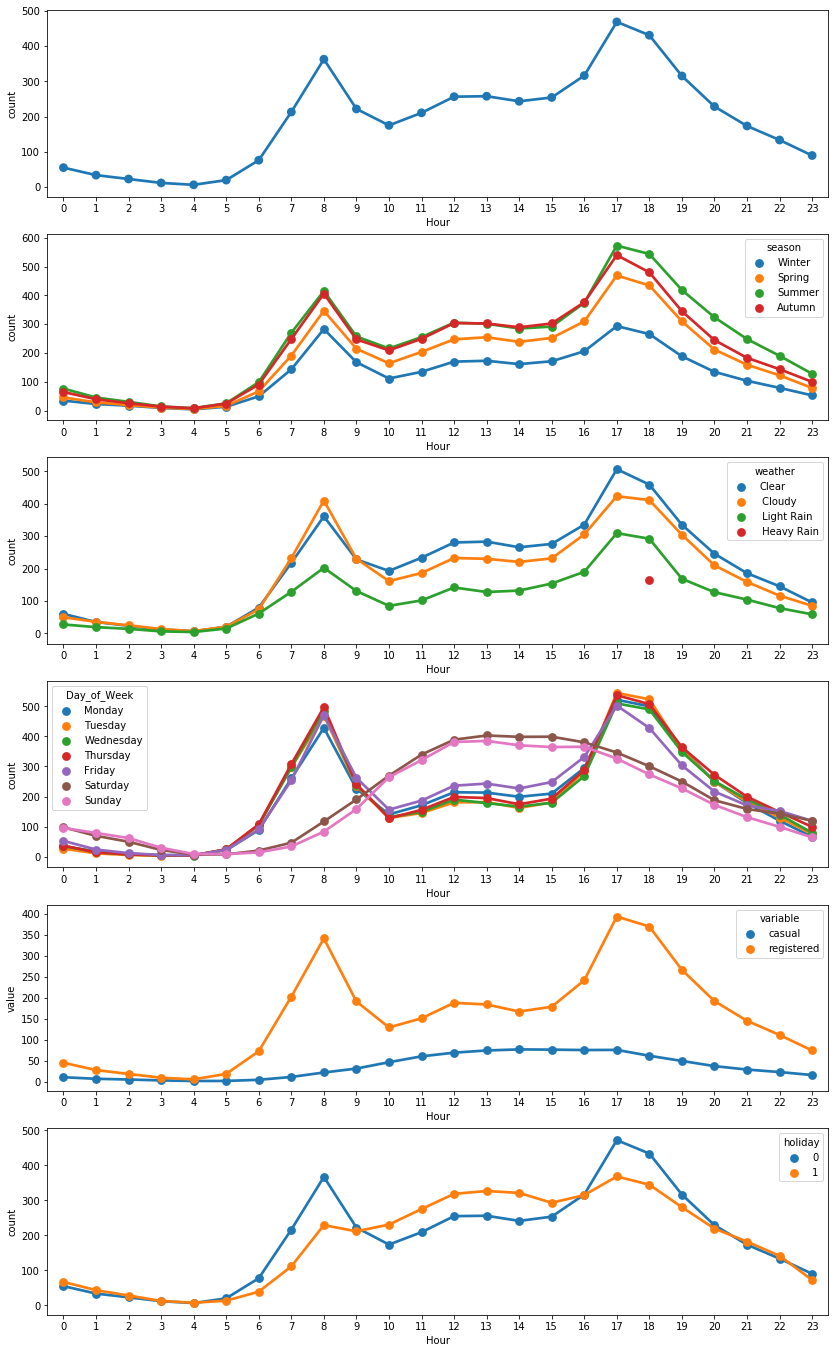

In [32]:
# Explore how demand varies hour by hour and how other variables contribute to the demand
fig, axes = plt.subplots(nrows=6,ncols=1,figsize=(14,24))

sns.pointplot(x='Hour',y='count',data=df_prep,ci=0,ax=axes[0])
sns.pointplot(x='Hour',y='count',data=df_prep,hue='season',ci=0,ax=axes[1])
sns.pointplot(x='Hour',y='count',data=df_prep,hue='weather',ci=0,ax=axes[2])
sns.pointplot(x='Hour',y='count',data=df_prep,hue='Day_of_Week',hue_order=weekday,ci=0,ax=axes[3])

#PLot registered and casual user counts over time using pd.melt
hourTransformed = pd.melt(df_prep[["Hour","casual","registered"]], id_vars=['Hour'], value_vars=['casual', 'registered'])
user_type = hourTransformed.groupby(["Hour","variable"],sort=True)["value"].mean().reset_index()
sns.pointplot(x='Hour',y='value',data=user_type,hue='variable',ci=0,ax=axes[4])

sns.pointplot(x='Hour',y='count',data=df_prep,hue='holiday',ci=0,ax=axes[5])

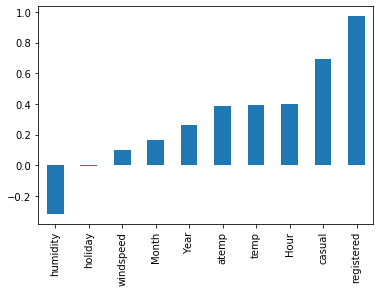

In [33]:
# Have a look at correlations with count
df_prep.corr()['count'].sort_values().drop('count').plot(kind='bar')

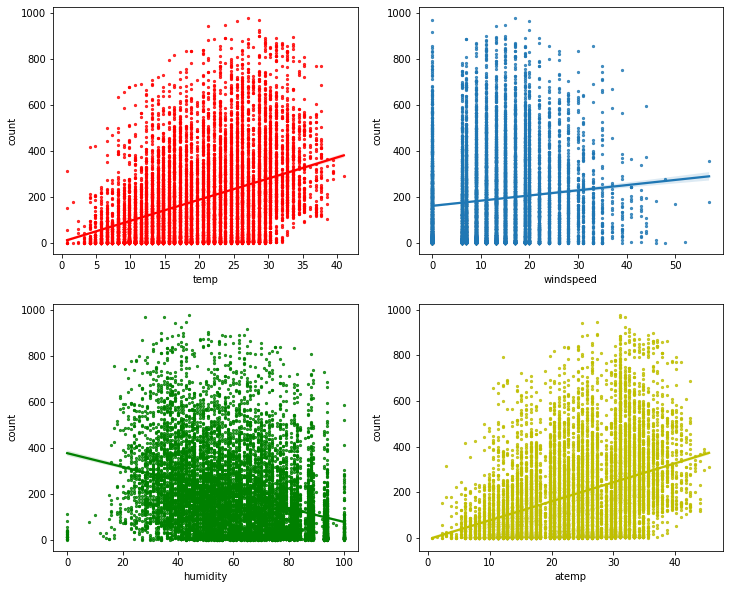

In [34]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))

sns.regplot(x="temp", y="count", data=df_prep,color='r', scatter_kws={'s':5},ax=axes[0][0])
sns.regplot(x="windspeed", y="count", data=df_prep,scatter_kws={'s':5},ax=axes[0][1])
sns.regplot(x="humidity", y="count", data=df_prep,color='g',scatter_kws={'s':5},ax=axes[1][0])
sns.regplot(x="atemp", y="count", data=df_prep,color='y',scatter_kws={'s':5},ax=axes[1][1])


In [15]:
#temp and a temp show almost identical plots. If we look at the heatmap showing correlations betwwen variables ,
#temp and atemp have a corr coef of 0.97 showing almost perfect correlation which makes sense.
#to avoid colinearity we will drop atemp
df_prep = df_prep.drop('atemp',axis=1)

In [36]:
#There seems to be a gap between windspeeds 0-7 in above plot.
#Check out the unique values of windpspeed
sorted(df_prep['windspeed'].unique())

[0.0,
 6.0032,
 7.0015,
 8.9981,
 11.0014,
 12.998,
 15.0013,
 16.9979,
 19.0012,
 19.9995,
 22.0028,
 23.9994,
 26.0027,
 27.9993,
 30.0026,
 31.0009,
 32.9975,
 35.0008,
 36.9974,
 39.0007,
 40.9973,
 43.0006,
 43.9989,
 46.0022,
 47.9988,
 50.0021,
 51.9987,
 56.9969]

In [37]:
#Count Values
df_prep['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

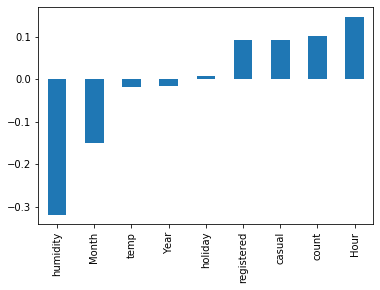

In [38]:
#It seems unusual that the most common wind speed is 0 especially as the second lowest windspeed recorded is 9
#Assume windspeed values =0 are due to faulty reedings or absence of windspeed data.
#Lets explore what can be used as a estimate for windspeed when windspeed values =0
#See what correlates the most with windspeed
df_prep.corr()['windspeed'].sort_values().drop('windspeed').plot(kind='bar')





In [39]:
#Humidity has the greatest correlation with windspeed so use this to get an estimate of windspeed for faulty windspeed 
#Check Value Counts
df_prep['humidity'].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
13      1
10      1
12      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [16]:
#There are 89 different values of humidity many of which only have 1 occurence
#Create humidity bins so average values from each bin are meaningful
def humidity_grouping(humidity):
    if humidity > 90:
        return "90-100"
    elif humidity >80:
        return "80-90"
    elif humidity >70:
        return "70-80"
    elif humidity >60:
        return "60-70"
    elif humidity >50:
        return "50-60"
    elif humidity >40:
        return "40-50"
    elif humidity >30:
        return "30-40"
    elif humidity >20:
        return "20-30"
    elif humidity >10:
        return "10-20"
    else:
        return "0-10"
    

In [17]:
df_prep['humidity_group'] = df_prep['humidity'].apply(lambda humidity: humidity_grouping(humidity))

In [42]:
#Check value counts for bins to see if there are now enough in each bin to extract meaningful averages.
df_prep['humidity_group'].value_counts()

60-70     1845
50-60     1814
40-50     1750
80-90     1620
70-80     1537
30-40     1146
90-100     682
20-30      414
10-20       54
0-10        24
Name: humidity_group, dtype: int64

In [18]:
#Create new variable containing humidity bins and associated average windspeed
avg_windspeed = df_prep.groupby('humidity_group').mean()['windspeed']
avg_windspeed

humidity_group
0-10      17.583592
10-20     24.370506
20-30     17.294707
30-40     17.080492
40-50     15.398553
50-60     13.087386
60-70     11.512503
70-80     10.628881
80-90      9.694805
90-100    10.104435
Name: windspeed, dtype: float64

In [19]:
#Create function which takes average windspeed from avg_windspeed varaible and the associated humidity bin
#and overwrites the values where windspeed=0
def fill_windspeed(humidity_group,windspeed):
    
    
    if windspeed ==0:
        return avg_windspeed[humidity_group]
    else:
        return windspeed

In [20]:
#apply function to get new windspeed values
df_prep['windspeed'] = df_prep.apply(lambda x: fill_windspeed(x['humidity_group'], x['windspeed']),axis=1)

In [46]:
df_prep['windspeed']

datetime
2011-01-01 00:00:00     9.694805
2011-01-01 01:00:00    10.628881
2011-01-01 02:00:00    10.628881
2011-01-01 03:00:00    10.628881
2011-01-01 04:00:00    10.628881
                         ...    
2012-12-19 19:00:00    26.002700
2012-12-19 20:00:00    15.001300
2012-12-19 21:00:00    15.001300
2012-12-19 22:00:00     6.003200
2012-12-19 23:00:00     8.998100
Name: windspeed, Length: 10886, dtype: float64

In [21]:
#No longer need humidty group
df_prep =df_prep.drop('humidity_group',axis=1)

Lets take a look at a regplot of windspeed against count now

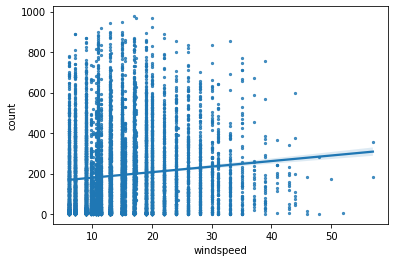

In [52]:
sns.regplot(x='windspeed',y='count',data=df_prep,scatter_kws={'s':5})

 It looks like there could be a positive linear realtionship between windspeed when windspeed is between 0-20.
 For windspeeds over this it appears that there is a neagative linear relationship. 

Create Windy category to further explore this.

In [63]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  object 
 1   holiday      10886 non-null  int64  
 2   weather      10886 non-null  object 
 3   temp         10886 non-null  float64
 4   humidity     10886 non-null  int64  
 5   windspeed    10886 non-null  float64
 6   casual       10886 non-null  int64  
 7   registered   10886 non-null  int64  
 8   count        10886 non-null  int64  
 9   Hour         10886 non-null  int64  
 10  Month        10886 non-null  int64  
 11  Day_of_Week  10886 non-null  object 
 12  Year         10886 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.5+ MB


In [22]:
def iswindy(windspeed):
    if windspeed > 20:
        return '1'
    else:
        return '0'

In [23]:
df_prep['windy'] = df_prep['windspeed'].apply(lambda windspeed: iswindy(windspeed))

In [24]:
Not_windy = df_prep[df_prep['windy']=='0']

In [25]:
Windy = df_prep[df_prep['windy']=='1']

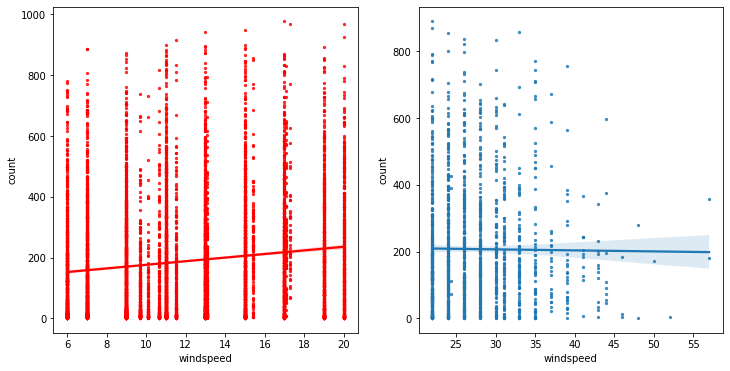

In [73]:
fig, axes = plt.subplots(ncols=2,figsize=(12,6))

sns.regplot(x='windspeed',y='count',data=Not_windy,scatter_kws={'s':5},color='r',ax=axes[0])
sns.regplot(x='windspeed',y='count',data=Windy,scatter_kws={'s':5},ax=axes[1])

The above plots show that there is a clear positive linear relationship for windspeeds between 0-20
but for greater windspeeds, no clear linear relationship exists. 

In [78]:
df_prep['windy'].value_counts()

0    9387
1    1499
Name: windy, dtype: int64

Most of the windspeeds are in the 0-20 range so keep windspeed.

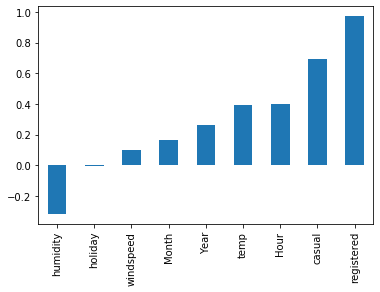

In [80]:
#Check corerlations with count
df_prep.corr()['count'].sort_values().drop('count').plot(kind='bar')

Registered and Casual are highly correlated. This makes sense as the count is the sum of registered and casual users.
To avoid data leakage remove these from the dataframe.

Also get rid of the windy column created earlier.

Create a new DataFrame as These Features could be useful in the future.

In [26]:
df_prep2 = df_prep.drop(['registered','casual','windy'],axis=1)

From the plots of Hour ainst count earlier, there were two distinct peaks during weekdays that reflect an increase in demand for times typically used for commuting to and from work or school etc.

Create a varaible to classify each entry as either Rush_Hour= 1 or not Rush_Hour=0

In [27]:
def Rushhour(Day_of_Week,Hour):
    if (Day_of_Week in ['Monday','Tuesday','Wednesday','Thursday','Friday']) & (Hour in [7,8,9,17,18]):
        return 1
    else:
        return 0

In [28]:
df_prep2['Rush_Hour'] = df_prep2.apply(lambda x: Rushhour(x['Day_of_Week'], x['Hour']),axis=1)

In [91]:
df_prep2.head()

,season,holiday,weather,temp,humidity,windspeed,count,Hour,Month,Day_of_Week,Year,Rush_Hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,0,Clear,9.84,81,9.694805,16,0,1,Saturday,2011,0
2011-01-01 01:00:00,Winter,0,Clear,9.02,80,10.628881,40,1,1,Saturday,2011,0
2011-01-01 02:00:00,Winter,0,Clear,9.02,80,10.628881,32,2,1,Saturday,2011,0
2011-01-01 03:00:00,Winter,0,Clear,9.84,75,10.628881,13,3,1,Saturday,2011,0
2011-01-01 04:00:00,Winter,0,Clear,9.84,75,10.628881,1,4,1,Saturday,2011,0


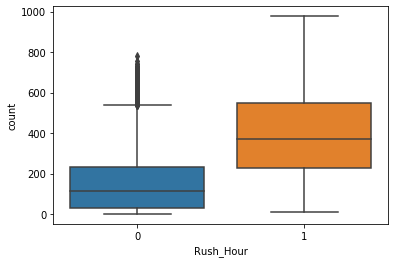

In [93]:
sns.boxplot(x='Rush_Hour',y='count',data=df_prep2)

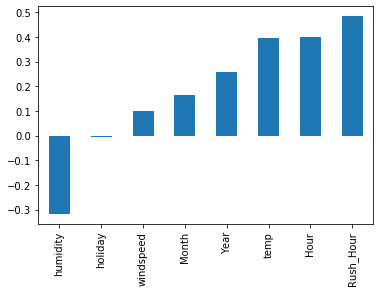

In [95]:
df_prep2.corr()['count'].sort_values().drop('count').plot(kind='bar')

In [29]:
#Month and Hour are being treated as continuos.
#Convert into categorical data
df_prep2['Month'] = df_prep2['Month'].map({1: "January", 2 : "February", 3 : "March", 4 :"April", 5 : "May", 6 : "June", 
                                          7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 
                                          12 : "December"})



In [114]:
df_prep2['Month']

datetime
2011-01-01 00:00:00     January
2011-01-01 01:00:00     January
2011-01-01 02:00:00     January
2011-01-01 03:00:00     January
2011-01-01 04:00:00     January
                         ...   
2012-12-19 19:00:00    December
2012-12-19 20:00:00    December
2012-12-19 21:00:00    December
2012-12-19 22:00:00    December
2012-12-19 23:00:00    December
Name: Month, Length: 10886, dtype: object

## Create dummy variables

In [49]:
#Check which variables are non_numeric
df_prep.select_dtypes(['object']).columns

Index(['season', 'weather', 'Day_of_Week'], dtype='object')

In [30]:
#Get dummies
dummies = pd.get_dummies(df_prep2[['season', 'weather', 'Day_of_Week','Month']],drop_first=True)
dummies.head()

,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain,weather_ Light Rain,weather_Clear,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
df_prep3 = df_prep2.drop(['season', 'weather', 'Day_of_Week','Month'],axis=1)
df = pd.concat([df_prep3,dummies],axis=1)
df.head()

,holiday,temp,humidity,windspeed,count,Hour,Year,Rush_Hour,season_Spring,season_Summer,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,9.84,81,9.694805,16,0,2011,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,9.02,80,10.628881,40,1,2011,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,9.02,80,10.628881,32,2,2011,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,9.84,75,10.628881,13,3,2011,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,9.84,75,10.628881,1,4,2011,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
Hour_dummies = pd.get_dummies(df_prep2['Hour'],drop_first=True)

In [36]:
df_prep3 = df.drop(['Hour'],axis=1)
df_with_dummies = pd.concat([df_prep3,Hour_dummies],axis=1)
df_with_dummies.head()

,holiday,temp,humidity,windspeed,count,Year,Rush_Hour,season_Spring,season_Summer,season_Winter,...,14,15,16,17,18,19,20,21,22,23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,9.84,81,9.694805,16,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,9.02,80,10.628881,40,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,9.02,80,10.628881,32,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,9.84,75,10.628881,13,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,9.84,75,10.628881,1,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Normalize the data  

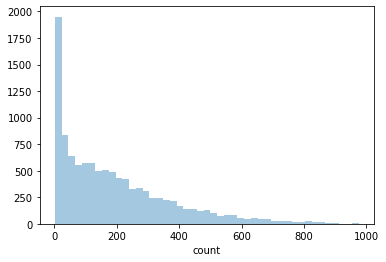

In [37]:
sns.distplot(df_with_dummies['count'],kde=False)

The above distribution of count shows that it is not normally distributed. It looks to have an exponential distribution. We can transform this to get a normal distribution by doing a log transformation.

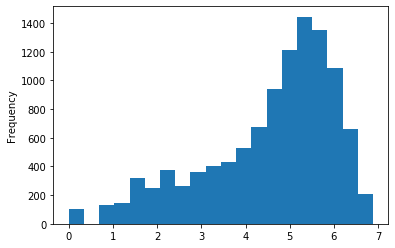

In [127]:
#Check that log transformation leads to normal distribution.
np.log(df_with_dummies['count']).plot(kind='hist',bins=20)

The distribution plot of log('count') shows a normal distribution with left skewness.
Normalize the count data using a log transformation.

In [38]:
df_with_dummies['count'] = np.log(df_with_dummies['count'])

In [129]:
df_with_dummies.head()

,holiday,temp,humidity,windspeed,count,Year,Rush_Hour,season_Spring,season_Summer,season_Winter,...,14,15,16,17,18,19,20,21,22,23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,9.84,81,9.694805,2.772589,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,9.02,80,10.628881,3.688879,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,9.02,80,10.628881,3.465736,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,9.84,75,10.628881,2.564949,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,9.84,75,10.628881,0.000000,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df = df_with_dummies
df.head()

,holiday,temp,humidity,windspeed,count,Year,Rush_Hour,season_Spring,season_Summer,season_Winter,...,14,15,16,17,18,19,20,21,22,23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,9.84,81,9.694805,2.772589,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,9.02,80,10.628881,3.688879,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,9.02,80,10.628881,3.465736,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,9.84,75,10.628881,2.564949,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,9.84,75,10.628881,0.000000,2011,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('count',axis=1)
y = df['count']

In [42]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Creating and training the Model

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [46]:
# print the intercept
print(lm.intercept_)

-981.9766415093064


In [47]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
holiday,0.046752
temp,0.028454
humidity,-0.003122
windspeed,-0.007305
Year,0.489954
Rush_Hour,1.381924
season_Spring,-0.135438
season_Summer,-0.020613
season_Winter,-0.240539
weather_ Heavy Rain,-0.377074


## Predictions

In [70]:
predictions = lm.predict(X_test)

plot y_test against predictions a narrow linear band shows good performance

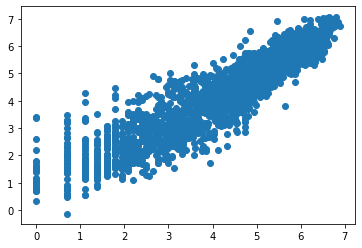

In [49]:
plt.scatter(y_test,predictions)

Examine for predictions and y_test converted back into pure count 

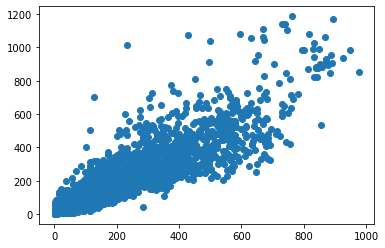

In [50]:
plt.scatter(np.exp(y_test),np.exp(predictions))

Residual Histogram
Normal distribution with sharp peak at 0 shows good performance

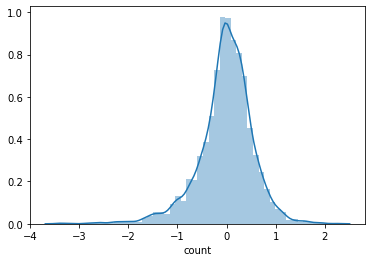

In [51]:
sns.distplot((y_test-predictions),bins=50);

In [58]:
predictions

array([ 5.15585495,  3.31578424,  4.84980586, ...,  5.14342861,
        5.67961547, -0.12422227])

In [52]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RSE:', metrics.r2_score(y_test,predictions))


MAE: 0.40173042947758203
MSE: 0.31373217458630936
RMSE: 0.5601180005912231
RSE: 0.8564900354023206


In [54]:
y.describe()

count    10886.000000
mean         4.552561
std          1.489043
min          0.000000
25%          3.737670
50%          4.976734
75%          5.648974
max          6.884487
Name: count, dtype: float64

In [64]:
print ("RMSLE Value For Linear Regression: ", metrics.mean_squared_log_error(np.exp(y_test),np.exp(predictions)))

RMSLE Value For Linear Regression:  0.2753126379154905


## Comments on the performance of the Linear Regression Model


RMSE:0.5601180005912231  ,  RMSLE Value:  0.2753126379154905 ,  mean of y is 4.552904   
The RMSE and RMSLE are relatively small compared to the mean value of the count showing good performance.
RSE: 0.8564900354023206
The RSE is high and shows that our model captures a large amount of the variation in the data.
Indicates good performance.

# Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfr = RandomForestRegressor(n_estimators=200)

In [67]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
pred = rfr.predict(X_test)

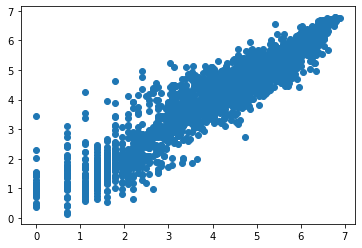

In [71]:
plt.scatter(y_test,pred)

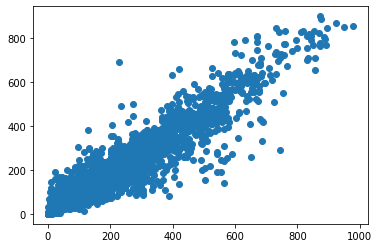

In [73]:
plt.scatter(np.exp(y_test),np.exp(pred))

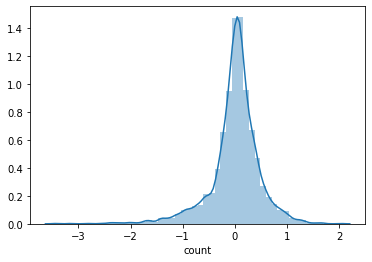

In [74]:
sns.distplot((y_test-pred),bins=50);

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('RSE:', metrics.r2_score(y_test,pred))
print ("RMSLE: ", metrics.mean_squared_log_error(np.exp(y_test),np.exp(pred)))


MAE: 0.3203659438957627
MSE: 0.22650444715762952
RMSE: 0.4759248335164173
RSE: 0.8963904635038766
RMSLE:  0.19833401616905402


In [78]:
imp_list=rfr.feature_importances_
feats = {}
for feature, importance in zip(df.columns, rfr.feature_importances_):
    feats[feature] = importance 

In [79]:
import operator
sorted_x = sorted(feats.items(), key=operator.itemgetter(1),reverse=True)
print (sorted_x)

[(3, 0.16729556722221864), (2, 0.139017883166067), (1, 0.10573485121164392), ('temp', 0.09686917137882359), (4, 0.0936435017383293), ('Month_September', 0.08107837228861867), ('humidity', 0.05583820084768696), ('Year', 0.048183747279394396), ('Day_of_Week_Saturday', 0.03113030642553061), ('Day_of_Week_Monday', 0.02912713560562988), ('count', 0.02216302312399022), ('windspeed', 0.019173042601170573), (5, 0.010922617855521692), (6, 0.0077593352001561955), (22, 0.006190674263817508), (18, 0.0059475610157993805), ('Month_August', 0.005693653672799365), ('weather_ Heavy Rain', 0.005571570582693616), ('holiday', 0.004910161818735494), (8, 0.0036888222149534726), ('Rush_Hour', 0.003453016603611033), ('Month_June', 0.0032474255024046773), ('Day_of_Week_Tuesday', 0.003182756445807864), (19, 0.003163081988109881), ('Day_of_Week_Thursday', 0.0031449128635514193), (15, 0.0031258882870806378), ('weather_ Light Rain', 0.003066044149929466), ('Month_December', 0.0029599540167716378), ('Month_May', 0.

## Gradient Boosting Regressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
GBR = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.01, max_depth=4)

In [83]:
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
GBRpred = GBR.predict(X_test)

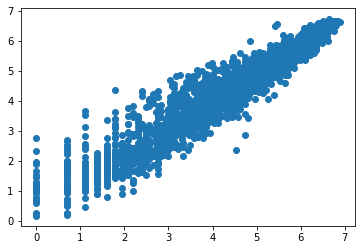

In [85]:
plt.scatter(y_test,GBRpred)

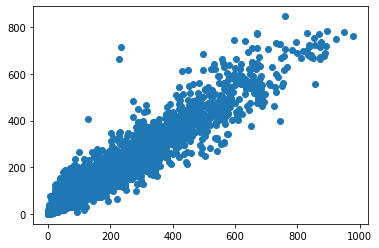

In [86]:
plt.scatter(np.exp(y_test),np.exp(GBRpred))

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, GBRpred))
print('MSE:', metrics.mean_squared_error(y_test, GBRpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GBRpred)))
print('RSE:', metrics.r2_score(y_test,GBRpred))
print ("RMSLE: ", metrics.mean_squared_log_error(np.exp(y_test),np.exp(GBRpred)))

MAE: 0.29667074589584036
MSE: 0.1859530268927155
RMSE: 0.4312227114760023
RSE: 0.9149398293579754
RMSLE:  0.1607146031968045


This performs well! Lets see if we can improve it by using GridSearch to optimize the parameters.

In [88]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000, 1500, 2000, 4000],
        'max_depth': [1, 2, 3, 4, 5]}

In [91]:
grid = GridSearchCV(GradientBoostingRegressor(),param_grid,refit=True,verbose=3)

In [92]:
grid.fit(X_train,y_train )

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.699, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.709, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.682, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.712, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.694, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, score=0.823, total=   1.5s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, score=0.834, total=   1.4s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, score=0.817, total=   1.5s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, score=0.834, total= 

[CV]  learning_rate=0.1, max_depth=2, n_estimators=4000, score=0.941, total=  24.6s
[CV] learning_rate=0.1, max_depth=2, n_estimators=4000 ...............
[CV]  learning_rate=0.1, max_depth=2, n_estimators=4000, score=0.948, total=  24.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=4000 ...............
[CV]  learning_rate=0.1, max_depth=2, n_estimators=4000, score=0.938, total=  26.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=4000 ...............
[CV]  learning_rate=0.1, max_depth=2, n_estimators=4000, score=0.942, total=  25.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=4000 ...............
[CV]  learning_rate=0.1, max_depth=2, n_estimators=4000, score=0.945, total=  23.8s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.859, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.871, to

[CV]  learning_rate=0.1, max_depth=4, n_estimators=1500, score=0.938, total=  23.6s
[CV] learning_rate=0.1, max_depth=4, n_estimators=1500 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=1500, score=0.943, total=  24.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, score=0.939, total=  34.6s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, score=0.943, total=  28.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, score=0.930, total=  23.6s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, score=0.939, total=  23.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, score=0.943, 

[CV]  learning_rate=0.01, max_depth=1, n_estimators=1000, score=0.702, total=   3.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1000 ..............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1000, score=0.675, total=   3.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1000 ..............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1000, score=0.705, total=   3.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1000 ..............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1000, score=0.686, total=   3.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1500 ..............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1500, score=0.743, total=   4.9s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1500 ..............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1500, score=0.755, total=   4.9s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1500 ..............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1500, score=

[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=0.443, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=500, score=0.793, total=   3.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=500, score=0.808, total=   3.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=500, score=0.785, total=   4.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=500, score=0.811, total=   3.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=500, score=0.792, total=   3.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=1000 ..............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=1000, score=0.857,

[CV]  learning_rate=0.01, max_depth=4, n_estimators=4000, score=0.923, total=  40.8s
[CV] learning_rate=0.01, max_depth=4, n_estimators=4000 ..............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=4000, score=0.930, total=  40.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=4000 ..............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=4000, score=0.935, total=  41.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.584, total=   1.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.602, total=   1.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.576, total=   1.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.60

[CV]  learning_rate=0.001, max_depth=1, n_estimators=2000, score=0.328, total=   5.9s
[CV] learning_rate=0.001, max_depth=1, n_estimators=2000 .............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=2000, score=0.342, total=   5.9s
[CV] learning_rate=0.001, max_depth=1, n_estimators=2000 .............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=2000, score=0.317, total=   5.6s
[CV] learning_rate=0.001, max_depth=1, n_estimators=2000 .............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=2000, score=0.340, total=   5.7s
[CV] learning_rate=0.001, max_depth=1, n_estimators=2000 .............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=2000, score=0.325, total=   6.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=4000 .............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=4000, score=0.493, total=  11.2s
[CV] learning_rate=0.001, max_depth=1, n_estimators=4000 .............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=4000,

[CV]  learning_rate=0.001, max_depth=3, n_estimators=1000, score=0.465, total=   7.8s
[CV] learning_rate=0.001, max_depth=3, n_estimators=1000 .............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=1000, score=0.441, total=   7.5s
[CV] learning_rate=0.001, max_depth=3, n_estimators=1500 .............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=1500, score=0.553, total=  11.5s
[CV] learning_rate=0.001, max_depth=3, n_estimators=1500 .............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=1500, score=0.569, total=  11.7s
[CV] learning_rate=0.001, max_depth=3, n_estimators=1500 .............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=1500, score=0.544, total=  11.5s
[CV] learning_rate=0.001, max_depth=3, n_estimators=1500 .............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=1500, score=0.575, total=  11.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=1500 .............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=1500,

[CV]  learning_rate=0.001, max_depth=5, n_estimators=500, score=0.412, total=   6.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=500, score=0.391, total=   6.4s
[CV] learning_rate=0.001, max_depth=5, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=500, score=0.411, total=   6.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=500, score=0.399, total=   6.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=1000 .............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=1000, score=0.582, total=  12.4s
[CV] learning_rate=0.001, max_depth=5, n_estimators=1000 .............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=1000, score=0.601, total=  12.8s
[CV] learning_rate=0.001, max_depth=5, n_estimators=1000 .............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=1000, sco

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 94.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...e=None,
                     

In [93]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 4000}

In [94]:
grid_predictions = grid.predict(X_test)

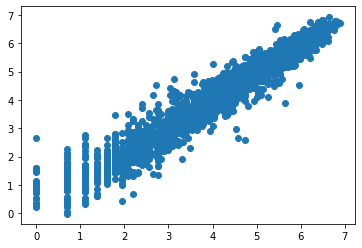

In [95]:
plt.scatter(y_test,grid_predictions)

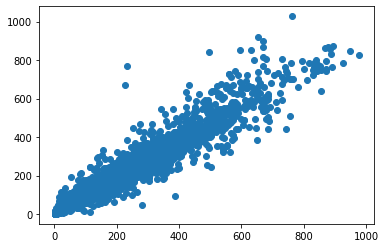

In [96]:
plt.scatter(np.exp(y_test),np.exp(grid_predictions))

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))
print('RSE:', metrics.r2_score(y_test,grid_predictions))
print ("RMSLE: ", metrics.mean_squared_log_error(np.exp(y_test),np.exp(grid_predictions)))

MAE: 0.23453325370196476
MSE: 0.1193197135847948
RMSE: 0.34542685706932924
RSE: 0.9454197903197576
RMSLE:  0.1002252448970563


# Support Vector Machine Regression

In [98]:
from sklearn.svm import SVR

In [100]:
param =  {'kernel':('linear', 'rbf'), 'C':[1,2,5,10,20,50], 'gamma':   [1,0.5,0.2,0.1,0.05,0.02,0.01,0.001]}

In [103]:
SVgrid = GridSearchCV(SVR(),param,refit=True,verbose=3)

In [104]:
SVgrid.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=1, gamma=1, kernel=linear, score=-26.385, total=   5.2s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] ....... C=1, gamma=1, kernel=linear, score=-30.093, total=   5.3s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


[CV] ....... C=1, gamma=1, kernel=linear, score=-34.088, total=   5.8s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ....... C=1, gamma=1, kernel=linear, score=-37.149, total=   5.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ....... C=1, gamma=1, kernel=linear, score=-41.665, total=   6.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ........... C=1, gamma=1, kernel=rbf, score=-0.021, total=   7.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ........... C=1, gamma=1, kernel=rbf, score=-0.011, total=   7.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.017, total=   7.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.010, total=   7.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] .... C=1, gamma=0.01, kernel=linear, score=-26.385, total=   7.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .... C=1, gamma=0.01, kernel=linear, score=-30.093, total=   5.3s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .... C=1, gamma=0.01, kernel=linear, score=-34.088, total=   7.5s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .... C=1, gamma=0.01, kernel=linear, score=-37.149, total=   7.4s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .... C=1, gamma=0.01, kernel=linear, score=-41.665, total=   6.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.568, total=   4.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.569, total=   4.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] .......... C=2, gamma=0.1, kernel=rbf, score=0.477, total=   6.7s
[CV] C=2, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=2, gamma=0.1, kernel=rbf, score=0.486, total=   8.0s
[CV] C=2, gamma=0.05, kernel=linear ..................................
[CV] ... C=2, gamma=0.05, kernel=linear, score=-190.762, total=   7.8s
[CV] C=2, gamma=0.05, kernel=linear ..................................
[CV] ... C=2, gamma=0.05, kernel=linear, score=-210.584, total=   6.9s
[CV] C=2, gamma=0.05, kernel=linear ..................................
[CV] ... C=2, gamma=0.05, kernel=linear, score=-185.016, total=   6.5s
[CV] C=2, gamma=0.05, kernel=linear ..................................
[CV] ... C=2, gamma=0.05, kernel=linear, score=-116.161, total=   7.3s
[CV] C=2, gamma=0.05, kernel=linear ..................................
[CV] ... C=2, gamma=0.05, kernel=linear, score=-157.834, total=   6.5s
[CV] C=2, gamma=0.05, kernel=rbf .....................................
[CV] .

[CV] .......... C=5, gamma=0.5, kernel=rbf, score=0.185, total=   8.6s
[CV] C=5, gamma=0.5, kernel=rbf ......................................
[CV] .......... C=5, gamma=0.5, kernel=rbf, score=0.186, total=   8.3s
[CV] C=5, gamma=0.5, kernel=rbf ......................................
[CV] .......... C=5, gamma=0.5, kernel=rbf, score=0.177, total=   8.2s
[CV] C=5, gamma=0.5, kernel=rbf ......................................
[CV] .......... C=5, gamma=0.5, kernel=rbf, score=0.210, total=   7.8s
[CV] C=5, gamma=0.2, kernel=linear ...................................
[CV] .... C=5, gamma=0.2, kernel=linear, score=-724.649, total=   6.7s
[CV] C=5, gamma=0.2, kernel=linear ...................................
[CV] ... C=5, gamma=0.2, kernel=linear, score=-1281.698, total=   5.8s
[CV] C=5, gamma=0.2, kernel=linear ...................................
[CV] .... C=5, gamma=0.2, kernel=linear, score=-964.820, total=   6.7s
[CV] C=5, gamma=0.2, kernel=linear ...................................
[CV] .

[CV] .. C=5, gamma=0.001, kernel=linear, score=-961.687, total=   7.1s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.001, kernel=rbf, score=0.738, total=   7.9s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.001, kernel=rbf, score=0.740, total=   7.0s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.001, kernel=rbf, score=0.747, total=   7.7s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.001, kernel=rbf, score=0.749, total=   4.8s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.001, kernel=rbf, score=0.722, total=   5.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .... C=10, gamma=1, kernel=linear, score=-2918.064, total=   7.2s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] . C=10, gamma=0.02, kernel=linear, score=-3662.315, total=   8.8s
[CV] C=10, gamma=0.02, kernel=linear .................................
[CV] . C=10, gamma=0.02, kernel=linear, score=-4023.812, total=   6.8s
[CV] C=10, gamma=0.02, kernel=linear .................................
[CV] . C=10, gamma=0.02, kernel=linear, score=-3729.139, total=   5.8s
[CV] C=10, gamma=0.02, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.02, kernel=rbf, score=0.787, total=   9.9s
[CV] C=10, gamma=0.02, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.02, kernel=rbf, score=0.776, total=   9.1s
[CV] C=10, gamma=0.02, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.02, kernel=rbf, score=0.769, total=   8.7s
[CV] C=10, gamma=0.02, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.02, kernel=rbf, score=0.764, total=   9.2s
[CV] C=10, gamma=0.02, kernel=rbf ....................................
[CV] .

[CV] .. C=20, gamma=0.1, kernel=linear, score=-9035.186, total=  11.1s
[CV] C=20, gamma=0.1, kernel=linear ..................................
[CV] . C=20, gamma=0.1, kernel=linear, score=-16412.817, total=   7.6s
[CV] C=20, gamma=0.1, kernel=linear ..................................
[CV] . C=20, gamma=0.1, kernel=linear, score=-14651.151, total=   6.7s
[CV] C=20, gamma=0.1, kernel=linear ..................................
[CV] . C=20, gamma=0.1, kernel=linear, score=-12812.600, total=   8.4s
[CV] C=20, gamma=0.1, kernel=linear ..................................
[CV] . C=20, gamma=0.1, kernel=linear, score=-14712.540, total=   6.2s
[CV] C=20, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=20, gamma=0.1, kernel=rbf, score=0.544, total=  10.2s
[CV] C=20, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=20, gamma=0.1, kernel=rbf, score=0.536, total=  10.0s
[CV] C=20, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] ........... C=50, gamma=1, kernel=rbf, score=0.052, total=  10.9s
[CV] C=50, gamma=1, kernel=rbf .......................................
[CV] ........... C=50, gamma=1, kernel=rbf, score=0.060, total=  11.0s
[CV] C=50, gamma=0.5, kernel=linear ..................................
[CV] . C=50, gamma=0.5, kernel=linear, score=-66636.735, total=   7.9s
[CV] C=50, gamma=0.5, kernel=linear ..................................
[CV] . C=50, gamma=0.5, kernel=linear, score=-88978.121, total=   8.3s
[CV] C=50, gamma=0.5, kernel=linear ..................................
[CV]  C=50, gamma=0.5, kernel=linear, score=-108700.170, total=   7.1s
[CV] C=50, gamma=0.5, kernel=linear ..................................
[CV] . C=50, gamma=0.5, kernel=linear, score=-64133.805, total=   9.0s
[CV] C=50, gamma=0.5, kernel=linear ..................................
[CV] . C=50, gamma=0.5, kernel=linear, score=-91744.972, total=   7.0s
[CV] C=50, gamma=0.5, kernel=rbf .....................................
[CV] .

[CV] ........ C=50, gamma=0.01, kernel=rbf, score=0.832, total=  20.7s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=50, gamma=0.01, kernel=rbf, score=0.829, total=  20.8s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=50, gamma=0.01, kernel=rbf, score=0.811, total=  23.4s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=50, gamma=0.01, kernel=rbf, score=0.826, total=  22.7s
[CV] C=50, gamma=0.001, kernel=linear ................................
[CV]  C=50, gamma=0.001, kernel=linear, score=-66636.735, total=   7.2s
[CV] C=50, gamma=0.001, kernel=linear ................................
[CV]  C=50, gamma=0.001, kernel=linear, score=-88978.121, total=   6.1s
[CV] C=50, gamma=0.001, kernel=linear ................................
[CV]  C=50, gamma=0.001, kernel=linear, score=-108700.170, total=   5.4s
[CV] C=50, gamma=0.001, kernel=linear ................................
[C

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 67.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 5, 10, 20, 50],
                         'gamma': [1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.001],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)